In [21]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
car_sales=pd.read_csv("Car_sales.csv", encoding='utf-8')
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [23]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.8+ KB


In [24]:
car_sales["Manufacturer"].value_counts()

Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Nissan         7
Chrysler       7
Mitsubishi     7
Mercury        6
Lexus          6
Volkswagen     6
Oldsmobile     6
Volvo          6
Pontiac        6
Cadillac       5
Honda          5
Saturn         5
Acura          4
Plymouth       4
Buick          4
BMW            3
Hyundai        3
Lincoln        3
Porsche        3
Audi           3
Jeep           3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [25]:
car_sales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


Saving figure attribute_histogram_plots


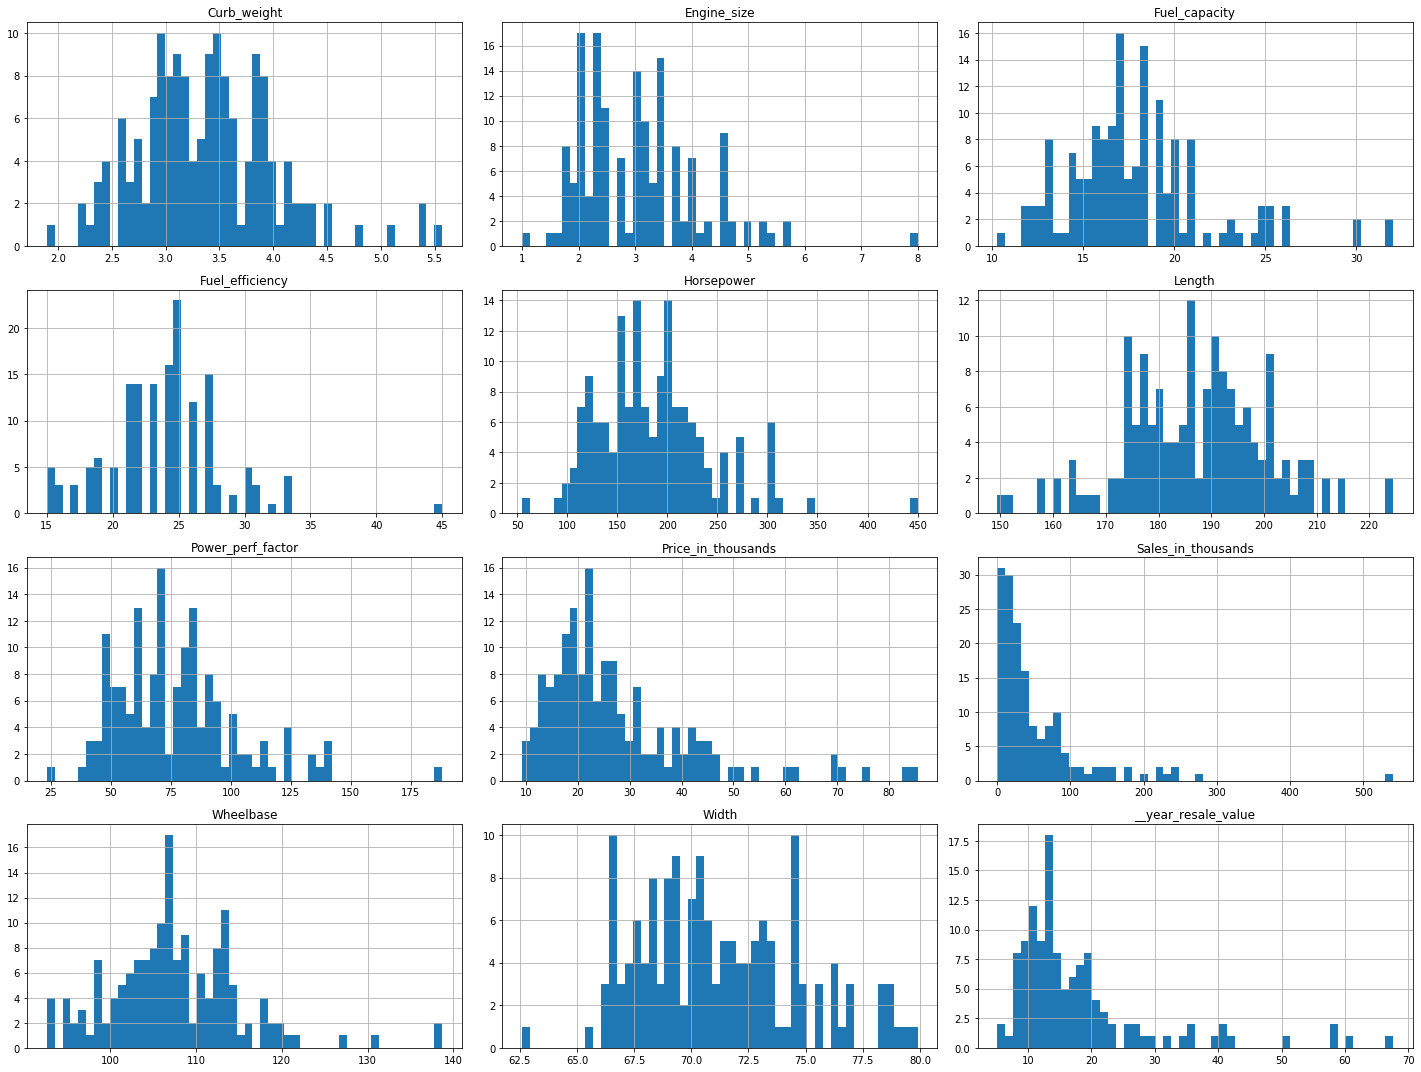

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
car_sales.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [27]:
np.random.seed(42)

In [28]:
corr_matrix = car_sales.corr()

In [30]:
# View which are the highest correlated attributes to a car's price point
corr_matrix["Price_in_thousands"].sort_values(ascending=False)

Price_in_thousands     1.000000
__year_resale_value    0.953840
Power_perf_factor      0.897945
Horsepower             0.839744
Engine_size            0.626875
Curb_weight            0.526224
Fuel_capacity          0.423282
Width                  0.329136
Length                 0.156935
Wheelbase              0.110513
Sales_in_thousands    -0.304734
Fuel_efficiency       -0.492157
Name: Price_in_thousands, dtype: float64

Saving figure scatter_matrix_plot


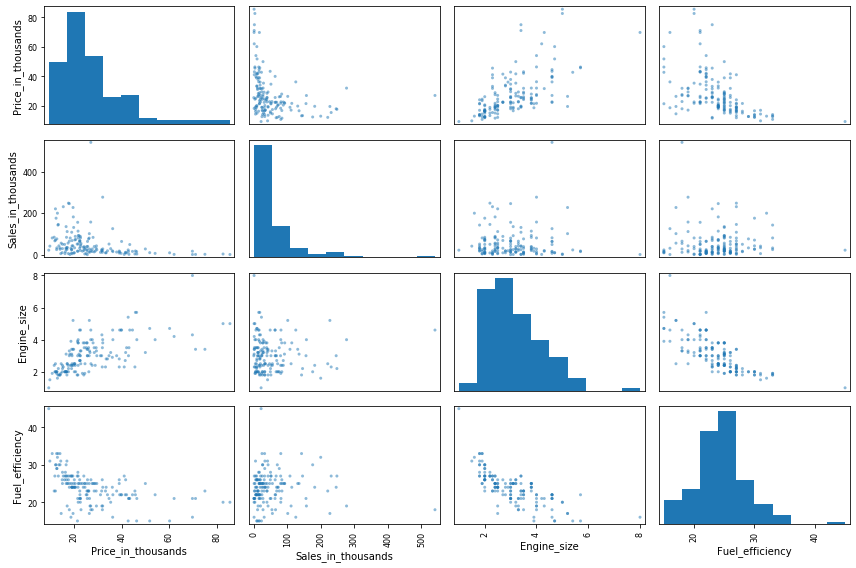

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["Sales_in_thousands", "Manufacturer", "Engine_size",
              "Fuel_efficiency"]
scatter_matrix(car_sales[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")